In [34]:
from Network import PINN, NetworkTrainer
from Physics import *
from Physics import NVS

In [35]:
model0 = PINN(width=32, length=6, is_steady=True)

## Define Physics

In [36]:
pde_points = 2000
bc_points = pde_points//4
W = 1.0
L = 10.0
def calc_loss():
    nonslip_x_above = Conditions.define_conditions(range_x=[0,L], range_y=W, range_t=None, num_points=bc_points, target_quantity_dict = {'u':0.0, 'v':0.0, 'p_y':0.0})
    nonslip_x_below = Conditions.define_conditions(range_x=[0,L], range_y=0, range_t=None, num_points=bc_points, target_quantity_dict = {'u':0.0, 'v':0.0, 'p_y':0.0})
    inlet = Conditions.define_conditions(range_x=0, range_y=[0,W], range_t=None, num_points=bc_points, target_quantity_dict = {'u':0.1, 'v':0.0, 'p_x':0.0})
    outlet = Conditions.define_conditions(range_x=L, range_y=[0,W], range_t=None, num_points=bc_points, target_quantity_dict = {'u_x':0, 'v_x':0, 'p':0.0})

    bc_loss = Conditions.loss_calc([nonslip_x_above, nonslip_x_below, inlet, outlet], model0)
    pde_loss = NVS.loss_cal(model=model0, range_x=[0,L], range_y=[0,W], num_points=pde_points)
    total_loss = bc_loss + pde_loss
    
    return {"bc_loss": bc_loss, "pde_loss": pde_loss, "total_loss": total_loss}

In [37]:
from visualize import Visualization

In [ ]:
model1 = NetworkTrainer.train_adam(model=model0, calc_loss=calc_loss, learning_rate=0.001, epochs=2000, print_every=100)

epoch 1, total_loss: 0.00516, bc_loss: 0.00510, pde_loss: 0.00006
epoch 101, total_loss: 0.00044, bc_loss: 0.00038, pde_loss: 0.00006
epoch 201, total_loss: 0.00044, bc_loss: 0.00038, pde_loss: 0.00006
epoch 301, total_loss: 0.00041, bc_loss: 0.00035, pde_loss: 0.00006
epoch 401, total_loss: 0.00037, bc_loss: 0.00033, pde_loss: 0.00005
epoch 501, total_loss: 0.00031, bc_loss: 0.00028, pde_loss: 0.00003
epoch 601, total_loss: 0.00025, bc_loss: 0.00023, pde_loss: 0.00002
epoch 701, total_loss: 0.00026, bc_loss: 0.00024, pde_loss: 0.00002
epoch 801, total_loss: 0.00023, bc_loss: 0.00019, pde_loss: 0.00004
epoch 901, total_loss: 0.00026, bc_loss: 0.00024, pde_loss: 0.00002
epoch 1001, total_loss: 0.00022, bc_loss: 0.00020, pde_loss: 0.00002
epoch 1101, total_loss: 0.00022, bc_loss: 0.00019, pde_loss: 0.00003


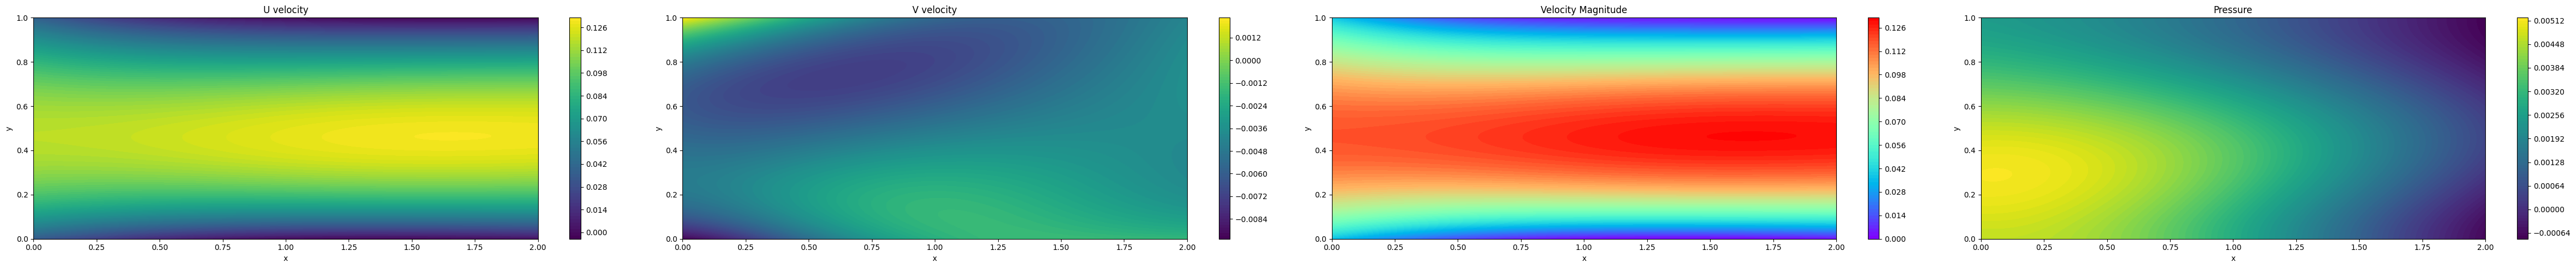

In [ ]:
Visualization.visualize_sol(model1,[0,L],[0,W],200)

In [ ]:
print(model1.loss_history_dict["bc_loss"][-1])

0.00035767757799476385
